In [1]:
# Step 1: Install Required Libraries
!pip install yfinance --quiet
!pip install scikit-learn --quiet
!pip install matplotlib --quiet
!pip install --upgrade yfinance
!pip install tensorflow
!pip install ta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.4/118.4 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.61
    Uninstalling yfinance-0.2.61:
      Successfully uninstalled yfinance-0.2.61
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=76dcde41f4fcbd84f71c6153da3630c8e7a18d03e7f0b71c2995844b91f52329
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [2]:
# Step 2: Import Libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import ta

In [3]:
# 🧾 Step 3: Define ticker and load data
ticker = "NVDA"  # You can change this
stock = yf.Ticker(ticker)
data = yf.download(ticker, start='2019-01-01', end='2025-05-31')
data = data[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()

print(f"\n✅ Loaded {len(data)} rows of data for {ticker}")
display(data.head())

<ipython-input-3-8aeac2b33129>:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2019-01-01', end='2025-05-31')
[*********************100%***********************]  1 of 1 completed


✅ Loaded 1612 rows of data for NVDA


Price,Open,High,Low,Close,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2019-01-02,3.239415,3.433820,3.224785,3.377780,508752000
2019-01-03,3.317523,3.351494,3.166265,3.173703,705552000
2019-01-04,3.246854,3.415222,3.216106,3.377036,585620000
2019-01-07,3.434316,3.592765,3.382987,3.555819,709160000
2019-01-08,3.637399,3.639631,3.394641,3.467295,786016000


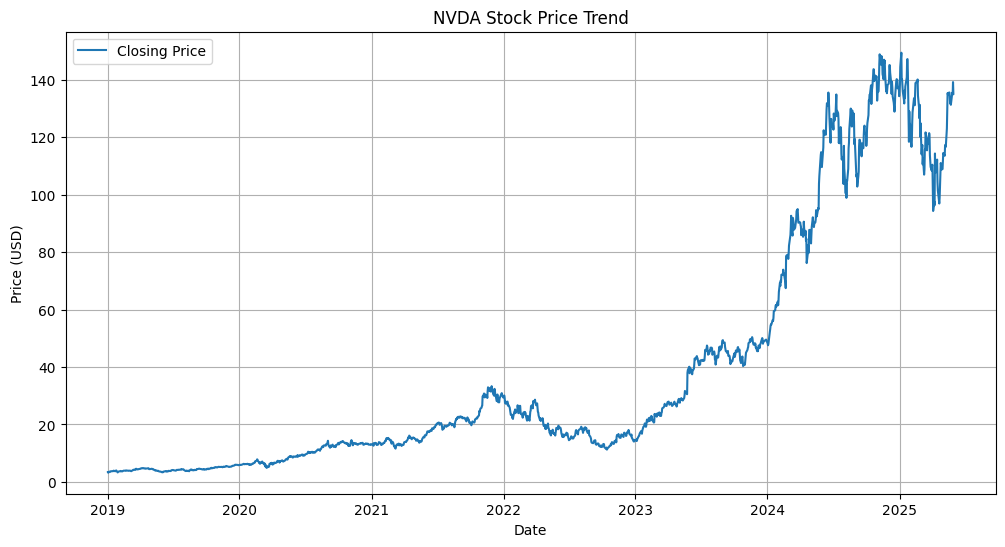

In [4]:
# Step 4: Visualize Price Trend
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Closing Price')
plt.title(f'{ticker} Stock Price Trend')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

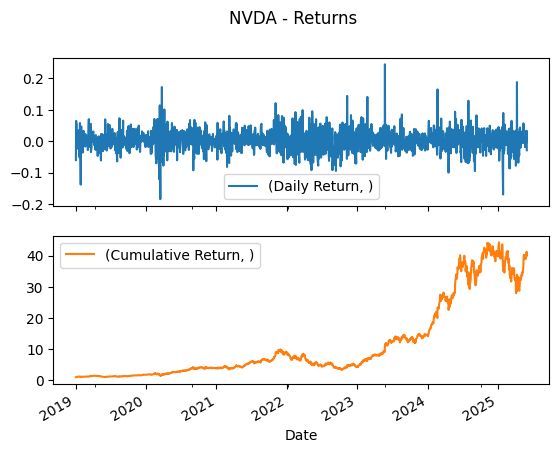

In [5]:
# Returns & Cumulative Return

data['Daily Return'] = data['Close'].pct_change()
data['Cumulative Return'] = (1 + data['Daily Return']).cumprod()

data[['Daily Return', 'Cumulative Return']].dropna().plot(subplots=True, title=f"{ticker} - Returns")
plt.show()

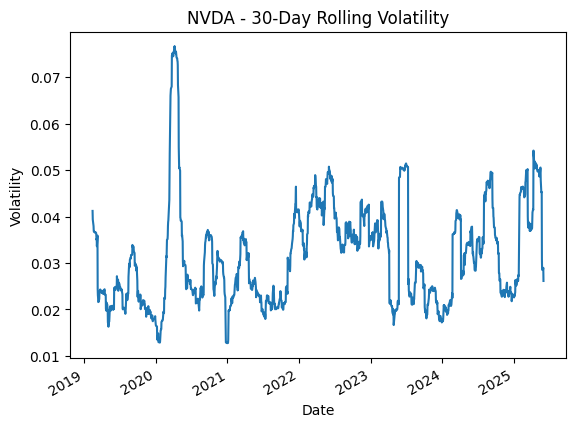

In [6]:
# Volatility (Rolling Std Dev)

data['Volatility (30D)'] = data['Daily Return'].rolling(window=30).std()
data['Volatility (30D)'].plot(title=f"{ticker} - 30-Day Rolling Volatility")
plt.ylabel("Volatility")
plt.show()

In [7]:
data

Price,Open,High,Low,Close,Volume,Daily Return,Cumulative Return,Volatility (30D)
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,,,
Date,,,,,,,,
2019-01-02,3.239415,3.433820,3.224785,3.377780,508752000,NaN,NaN,NaN
2019-01-03,3.317523,3.351494,3.166265,3.173703,705552000,-0.060417,0.939583,NaN
2019-01-04,3.246854,3.415222,3.216106,3.377036,585620000,0.064068,0.999780,NaN
2019-01-07,3.434316,3.592765,3.382987,3.555819,709160000,0.052941,1.052709,NaN
2019-01-08,3.637399,3.639631,3.394641,3.467295,786016000,-0.024895,1.026501,NaN
...,...,...,...,...,...,...,...,...
2025-05-23,130.000000,132.679993,129.160004,131.289993,198821300,-0.011594,38.868726,0.028542
2025-05-27,134.149994,135.660004,133.309998,135.500000,192953600,0.032066,40.115108,0.028567


In [8]:
info = stock.info
print("\n Key Fundamentals:")
for key in ['sector', 'industry', 'marketCap', 'trailingPE', 'forwardPE', 'dividendYield', 'beta']:
    print(f"{key:>15}: {info.get(key)}")


 Key Fundamentals:
         sector: Technology
       industry: Semiconductors
      marketCap: 3456210829312
     trailingPE: 45.71613
      forwardPE: 34.39806
  dividendYield: 0.03
           beta: 2.122


In [9]:
stock.quarterly_earnings

/usr/local/lib/python3.11/dist-packages/yfinance/scrapers/fundamentals.py:36: DeprecationWarning: 'Ticker.earnings' is deprecated as not available via API. Look for "Net Income" in Ticker.income_stmt.
  warnings.warn("'Ticker.earnings' is deprecated as not available via API. Look for \"Net Income\" in Ticker.income_stmt.", DeprecationWarning)


In [10]:
# Get quarterly earnings
earnings = stock.quarterly_earnings

print("\n Quarterly Earnings (raw):")
print(earnings)

# Check if earnings is valid and plot
if isinstance(earnings, pd.DataFrame) and not earnings.empty:
    earnings.plot(y='Earnings', title=f"{ticker} - Quarterly Earnings")
    plt.show()
else:
    print(" Quarterly earnings data not available for this ticker.")


 Quarterly Earnings (raw):
None
 Quarterly earnings data not available for this ticker.


/usr/local/lib/python3.11/dist-packages/yfinance/scrapers/fundamentals.py:36: DeprecationWarning: 'Ticker.earnings' is deprecated as not available via API. Look for "Net Income" in Ticker.income_stmt.
  warnings.warn("'Ticker.earnings' is deprecated as not available via API. Look for \"Net Income\" in Ticker.income_stmt.", DeprecationWarning)


**Prediction**

**Linear Regression**

In [11]:
# Feature Engineering for Prediction
data['Days'] = (data.index - data.index[0]).days
X = data[['Days']]
y = data['Close']

In [12]:
# Train/Test Split and Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

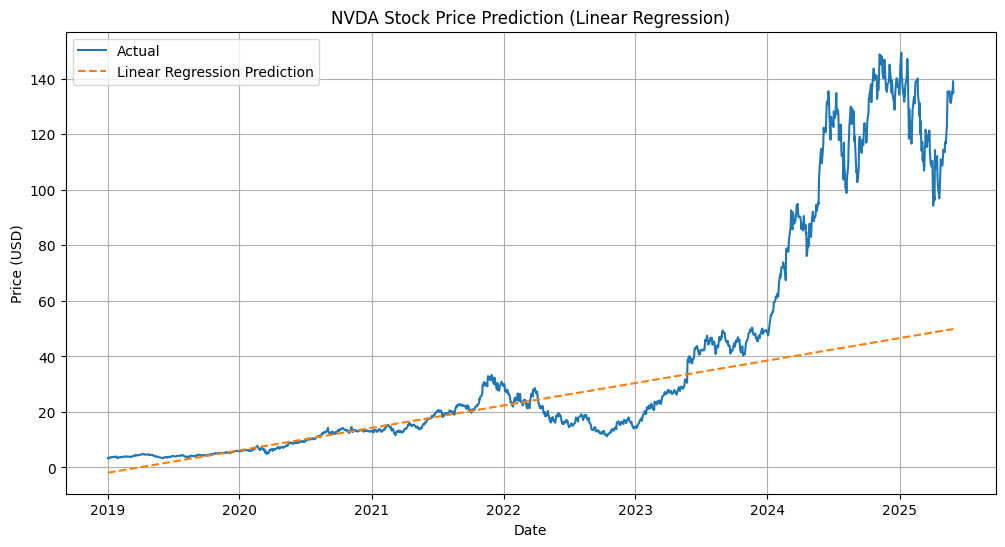

In [13]:
data['Predicted'] = model.predict(X)

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Actual')
plt.plot(data.index, data['Predicted'], label='Linear Regression Prediction', linestyle='--')
plt.title(f'{ticker} Stock Price Prediction (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Show Model Performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.2f}")

Mean Squared Error on Test Set: 5550.42


**NN Prediction**

<ipython-input-17-603e026b0a6b>:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2019-01-01', end='2025-05-31')
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0138
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.7919e-04
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.0058e-04
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7400e-04
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8323e-04
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6368e-04
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0999e-04
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.9837e-04
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1956e-04
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7309e-04
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5496e-04
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.3752e-04
Epoch 15/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s

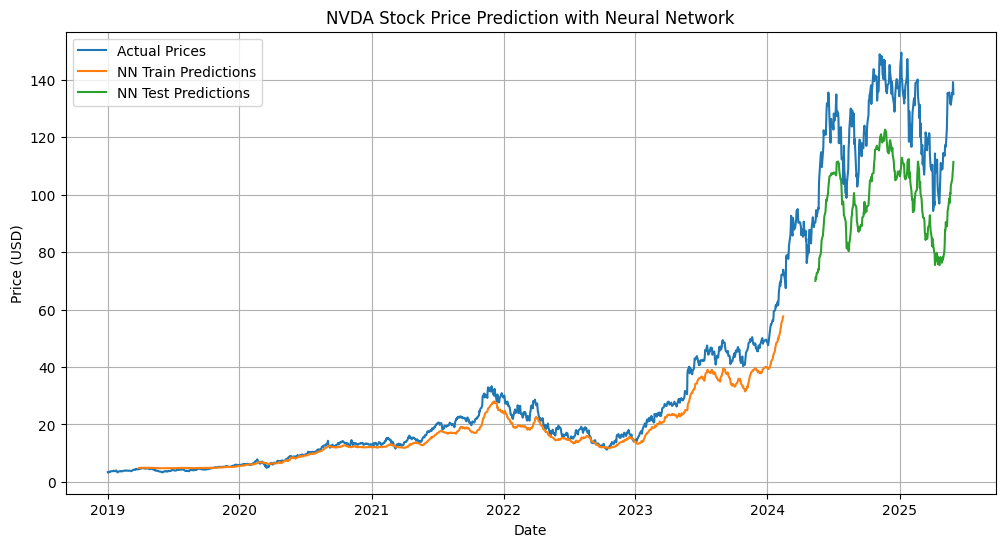

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
NN Predicted price for next trading day: $111.10


In [17]:

# Standard Neural Network Model for Stock Price Prediction
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Create datasets with lookback period
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Data preparation - using the same ticker as before
data = yf.download(ticker, start='2019-01-01', end='2025-05-31')
dataset = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create the training dataset
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:train_size, :]
test_data = scaled_data[train_size:, :]

# Create datasets with lookback period (using same function as before)
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Flatten input for standard neural network
# Standard NN doesn't need time step dimension like LSTM/RNN
X_train_nn = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test_nn = X_test.reshape(X_test.shape[0], X_test.shape[1])

# Build standard neural network model
nn_model = Sequential()
nn_model.add(Dense(units=100, activation='relu', input_dim=time_step))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(units=50, activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(units=25, activation='relu'))
nn_model.add(Dense(units=1))

# Compile and fit the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')
nn_model.fit(X_train_nn, y_train, batch_size=32, epochs=20, verbose=1)

# Make predictions
train_predict = nn_model.predict(X_train_nn)
test_predict = nn_model.predict(X_test_nn)

# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predict))
print(f'NN Train RMSE: {train_rmse:.2f}')
print(f'NN Test RMSE: {test_rmse:.2f}')

# Visualize the prediction results
# Shift train predictions for plotting
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step, :] = train_predict

# Shift test predictions for plotting
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_step * 2):len(dataset), :] = test_predict

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(data.index, scaler.inverse_transform(scaled_data), label='Actual Prices')
plt.plot(data.index, train_predict_plot, label='NN Train Predictions')
plt.plot(data.index, test_predict_plot, label='NN Test Predictions')
plt.title(f'{ticker} Stock Price Prediction with Neural Network')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Future prediction
# Use last 60 days to predict the next day
last_60_days = scaled_data[-60:]
X_future = last_60_days.reshape(1, time_step)  # Flattened for NN
future_price = nn_model.predict(X_future)
future_price = scaler.inverse_transform(future_price)
print(f"NN Predicted price for next trading day: ${future_price[0][0]:.2f}")

**RNN Prediction**

<ipython-input-18-fb3e0abb54ef>:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2019-01-01', end='2025-05-31')
[*********************100%***********************]  1 of 1 completed


Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0553
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0063
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0038
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0018
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0016
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0014
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 9.2838e-04
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0012
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 7.9597e-04
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 8.2610e-04
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 6.6204e-04
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 5.1114e-04
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 5.1489e-04
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 4.6520e-04
Epoch 15/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 3

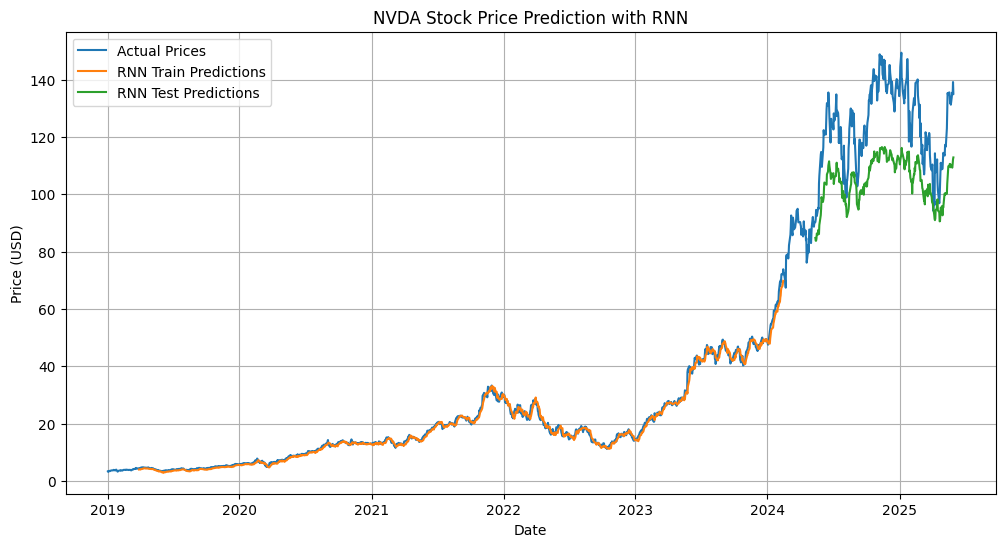

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
RNN Predicted price for next trading day: $111.78


In [18]:
# RNN Model for Stock Price Prediction
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Data preparation - using the same ticker as before
data = yf.download(ticker, start='2019-01-01', end='2025-05-31')
dataset = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create the training dataset
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:train_size, :]
test_data = scaled_data[train_size:, :]

# Create datasets with lookback period (using same function as LSTM)
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input for RNN [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(time_step, 1)))
rnn_model.add(Dropout(0.2))
rnn_model.add(SimpleRNN(units=50, return_sequences=False))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(units=25))
rnn_model.add(Dense(units=1))

# Compile and fit the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')
rnn_model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1)

# Make predictions
train_predict = rnn_model.predict(X_train)
test_predict = rnn_model.predict(X_test)

# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predict))
print(f'RNN Train RMSE: {train_rmse:.2f}')
print(f'RNN Test RMSE: {test_rmse:.2f}')

# Visualize the prediction results
# Shift train predictions for plotting
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step, :] = train_predict

# Shift test predictions for plotting
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_step * 2):len(dataset), :] = test_predict

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(data.index, scaler.inverse_transform(scaled_data), label='Actual Prices')
plt.plot(data.index, train_predict_plot, label='RNN Train Predictions')
plt.plot(data.index, test_predict_plot, label='RNN Test Predictions')
plt.title(f'{ticker} Stock Price Prediction with RNN')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Future prediction
# Use last 60 days to predict the next day
last_60_days = scaled_data[-60:]
X_future = last_60_days.reshape(1, time_step, 1)
future_price = rnn_model.predict(X_future)
future_price = scaler.inverse_transform(future_price)
print(f"RNN Predicted price for next trading day: ${future_price[0][0]:.2f}")

**LSTM Prediction**

<ipython-input-19-7db22c58f8f3>:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0024
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 1.7793e-04
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 1.6517e-04
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 2.1747e-04
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 1.4235e-04
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 1.0991e-04
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 1.1240e-04
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 1.2149e-04
Epoch 9/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 1.0343e-04
Epoch 10/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 1.0939e-04
Epoch 11/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 8.9058e-05
Epoch 12/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 9.0157e-05
Epoch 13/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - loss: 1.0037e-04
Epoch 14/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 8.1917e-05
Epoch 15/20
43/43 ━

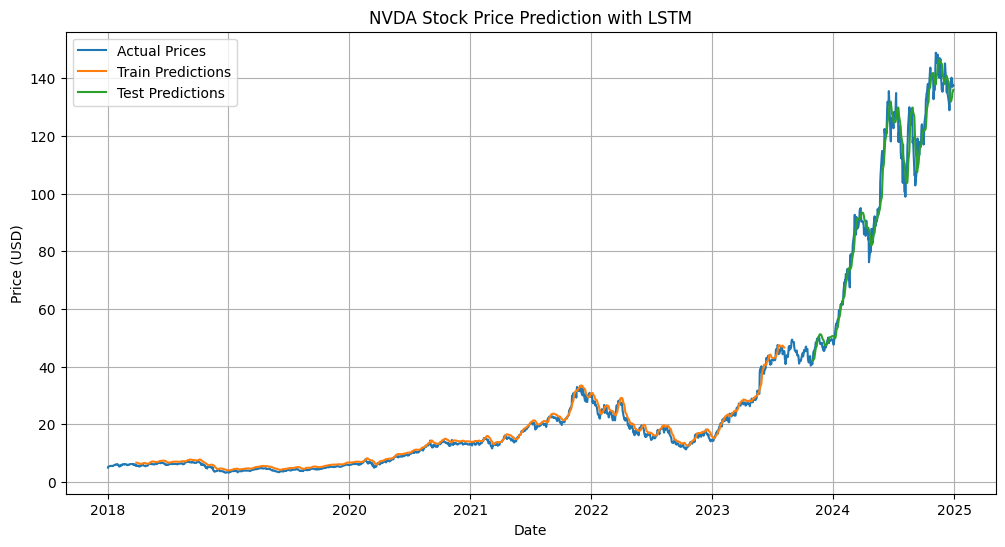

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
Predicted price for next trading day: $136.85


In [19]:
# Step 9: LSTM Model for Stock Price Prediction
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np


# Data preparation
data = yf.download(ticker, start='2018-01-01', end='2024-12-31')
dataset = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create the training dataset
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:train_size, :]
test_data = scaled_data[train_size:, :]



time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input for LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predict))
print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')

# Visualize the prediction results
# Shift train predictions for plotting
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step, :] = train_predict

# Shift test predictions for plotting
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_step * 2):len(dataset), :] = test_predict

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(data.index, scaler.inverse_transform(scaled_data), label='Actual Prices')
plt.plot(data.index, train_predict_plot, label='Train Predictions')
plt.plot(data.index, test_predict_plot, label='Test Predictions')
plt.title(f'{ticker} Stock Price Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Future prediction
# Use last 60 days to predict the next day
last_60_days = scaled_data[-60:]
X_future = last_60_days.reshape(1, time_step, 1)
future_price = model.predict(X_future)
future_price = scaler.inverse_transform(future_price)
print(f"Predicted price for next trading day: ${future_price[0][0]:.2f}")